In [1]:
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet
from biological_fuzzy_logic_networks.DREAM.DREAMdataset import DREAMBioFuzzDataset
from biological_fuzzy_logic_networks.utils import read_sif

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

/Users/adr/miniconda3/envs/biofuzznet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
inhibitor_mapping = {"EGF": np.nan, "full" : np.nan,
                     "iEGFR": "EGFR", "iMEK": 'MEK12_S221', 
                     "iPI3K": "PI3K", "iPKC": "PKC"}
node_names_to_data_mapping = {
    'EGF': 'EGF',
    'SERUM' : 'SERUM'    , 
    'b.CATENIN' : 'b-catenin', 
    'cleavedCas' : 'cleavedCas', 
#     'CyclinB' : , 
#     'GAPDH' : , 
#     'IdU' :  , 
#     'Ki.67' : , 
    'p.4EBP1' : '4EBP1', 
    'p.Akt.Ser473.' : 'AKT_S473' , 
    'p.AKT.Thr308.' : 'AKT_T308' , 
    'p.AMPK' : 'AMPK', 
    'p.BTK' : 'BTK', 
    'p.CREB' : 'CREB', 
    'p.ERK' : 'ERK12', 
    'p.FAK' : 'FAK', 
    'p.GSK3b' : 'GSK3B', 
    'p.H3' : 'H3', 
#     'p.HER2' : , 
    'p.JNK' : 'JNK', 
    'p.MAP2K3' : 'MAP3Ks', 
    'p.MAPKAPK2' : 'MAPKAPK2', 
    'p.MEK' : 'MEK12_S221', 
    'p.MKK3.MKK6' : 'MKK36', 
    'p.MKK4' : 'MKK4', 
    'p.NFkB' : 'NFkB', 
    'p.p38' : 'p38', 
    'p.p53' : 'p53', 
    'p.p90RSK' : 'p90RSK', 
    'p.PDPK1' : 'PDPK1', 
    'p.PLCg2' : 'PLCg2', 
    'p.RB' : 'RB', 
    'p.S6' : 'S6', 
    'p.S6K' : 'p70S6K', 
    'p.SMAD23' : 'SMAD23'   , 
    'p.SRC' : 'SRC', 
    'p.STAT1' : 'STAT1', 
    'p.STAT3' : 'STAT3', 
    'p.STAT5' : 'STAT5'}

In [ ]:
nodes, edges = read_sif("/Users/adr/Box/CAR_Tcells/Data/DREAMdata/DREAM_PKN_for_BFZ_input.sif")
edges[("JNK", "p53")] = 1
my_model = DREAMBioFuzzNet(nodes, edges)
p = draw_BioFuzzNet(my_model)

In [ ]:
my_model.root_nodes

['SERUM', 'EGF']

In [5]:
cl_data = pd.read_csv("/Users/adr/Box/CAR_Tcells/Data/DREAMdata/ZR7530.csv")
non_marker_cols = ["treatment", "cell_line", "time", "cellID", "fileID", "inhibitor"]

cl_data = cl_data[cl_data["time"]==9]
cl_data.loc[:, ["EGF", "SERUM"]]  = 1
cl_data.loc[:,"inhibitor"] = [inhibitor_mapping[treatment]  for treatment in cl_data["treatment"]]

cl_data = cl_data.rename(columns = node_names_to_data_mapping)

markers = [c for c in cl_data.columns if not c in non_marker_cols]
scaler = MinMaxScaler()
cl_data[markers] = scaler.fit_transform(cl_data[markers])
non_network_measurements = [m for m in markers if m not in node_names_to_data_mapping.values()]
cl_data = cl_data.drop(["treatment", "cell_line", "time", "cellID", "fileID"] + non_network_measurements, axis=1)
cl_data.loc[:, ["EGF", "SERUM"]]  = 1

cl_data

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_97322/3661902056.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cl_data.loc[:, ["EGF", "SERUM"]]  = 1
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_97322/3661902056.py:15: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cl_data.loc[:, ["EGF", "SERUM"]]  = 1


b-catenin  cleavedCas     4EBP1  AKT_S473  AKT_T308      AMPK  \
25595    0.395636    0.402194  0.554408  0.377560  0.180243  0.360751   
25596    0.000000    0.140044  0.243706  0.465025  0.168604  0.281311   
25597    0.279084    0.432673  0.643641  0.339079  0.191971  0.327951   
25598    0.000000    0.267420  0.300175  0.808092  0.000000  0.414030   
25599    0.530664    0.402922  0.645685  0.541565  0.295295  0.417205   
...           ...         ...       ...       ...       ...       ...   
438604   0.605812    0.292460  0.723369  0.469619  0.197461  0.376348   
438605   0.000000    0.000000  0.276717  0.613644  0.064744  0.262601   
438606   0.584230    0.312458  0.536293  0.567080  0.133814  0.365786   
438607   0.125551    0.480262  0.601018  0.515862  0.350015  0.409957   
438608   0.216619    0.424140  0.367495  0.477646  0.081910  0.370178   

             BTK          CREB     ERK12       FAK  ...        S6    p70S6K  \
25595   0.724974  2.961296e-01  0.330656  0.541411  ...  0.273289  0.369775   
25596   0.473937  1.611169e-07  0.241769  0.507552  ...  0.378096  0.109032   
25597   0.673063  2.144081e-01  0.388390  0.574907  ...  0.395779  0.563735   
25598   0.418127  2.696125e-01  0.407983  0.499136  ...  0.453254  0.726091   
25599   0.850801  3.145570e-01  0.438286  0.696340  ...  0.609928  0.596778   
...          ...           ...       ...       ...  ...       ...       ...   
438604  0.702688  2.378303e-01  0.343494  0.592003  ...  0.384682  0.554484   
438605  0.435562  1.284888e-01  0.330554  0.383168  ...  0.353103  0.277070   
438606  0.560573  2.156951e-01  0.379931  0.788125  ...  0.391360  0.604408   
438607  0.684871  3.229089e-01  0.427007  0.686195  ...  0.356163  0.653604   
438608  0.680190  1.989979e-01  0.387460  0.485869  ...  0.217364  0.514302   

          SMAD23       SRC     STAT1     STAT3     STAT5  EGF  SERUM  \
25595   0.186604  0.383592  0.328056  0.441879  0.340322    1      1   
25596   0.478256  0.245605  0.355943  0.169588  0.300694    1      1   
25597   0.486540  0.255902  0.368843  0.457316  0.304705    1      1   
25598   0.000000  0.398669  0.446374  0.232850  0.345303    1      1   
25599   0.634626  0.410794  0.434798  0.531388  0.382133    1      1   
...          ...       ...       ...       ...       ...  ...    ...   
438604  0.375520  0.454312  0.329122  0.651206  0.379009    1      1   
438605  0.445072  0.132246  0.303992  0.311794  0.383396    1      1   
438606  0.340593  0.354785  0.456384  0.446863  0.387726    1      1   
438607  0.737798  0.315952  0.361219  0.413430  0.336527    1      1   
438608  0.609506  0.260296  0.281700  0.363903  0.343128    1      1   

        inhibitor  
25595         NaN  
25596         NaN  
25597         NaN  
25598         NaN  
25599         NaN  
...           ...  
438604        PKC  
438605        PKC  
438606        PKC  
438607        PKC  
438608        PKC  

[57951 rows x 35 columns]

In [6]:
train, test = train_test_split(cl_data)
print(train.shape)
print(test.shape)
train = train.to_dict("list")
test = test.to_dict("list")

train_data = {k: torch.DoubleTensor(v) for k, v in train.items() if k in markers}
test_data = {k: torch.DoubleTensor(v) for k, v in test.items() if k in markers}

train_inhibitors = {m1: torch.DoubleTensor([10. if m==m1 else 1. for m in train["inhibitor"]]) for m1 in my_model.nodes()}
test_inhibitors = {m1: torch.DoubleTensor([10. if m==m1 else 1. for m in test["inhibitor"]]) for m1 in my_model.nodes()}

input_train = {"SERUM": train["SERUM"], "EGF": train["EGF"]}
input_test = {"SERUM": test["SERUM"], "EGF": test["EGF"]} 




(43463, 35)
(14488, 35)


In [7]:
# specify some optimisation parameters

learning_rate = 5e-3
epochs = 10 
batch_size = 300

In [8]:
loss = my_model.conduct_optimisation(input = input_train,
                                     test_input = input_test,
                                     ground_truth=train_data,
                                     test_ground_truth=test_data,
                                     train_inhibitors = train_inhibitors,
                                     test_inhibitors = test_inhibitors,
                                     epochs = epochs,
                                     learning_rate= learning_rate,
                                     batch_size= batch_size
                                         )

  0%|                                                    | 0/10 [00:00<?, ?it/s]/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_netwo

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

 30%|███████████▍                          | 3/10 [3:04:52<7:17:03, 3746.26s/it]/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_netwo

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not present in ground truth. Its

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PIP3 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node MSK12 is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node AKT is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node cAMP is not present in ground truth. Its ground_truth value is not set.
  #     warnings.warn(
/Users/adr/Projects/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:366: UserWarning: Node PKA is not pres

<AxesSubplot: xlabel='time', ylabel='loss'>

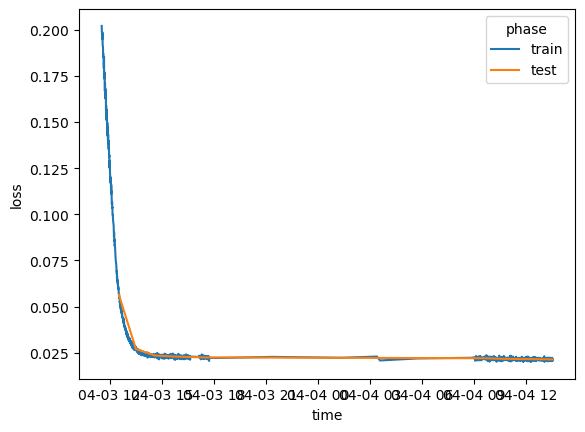

In [9]:
sns.lineplot(data=loss, x='time', y='loss', hue='phase')

In [23]:
len(my_model.output_states["PLCg2"])

14488

Text(0, 0.5, 'True')

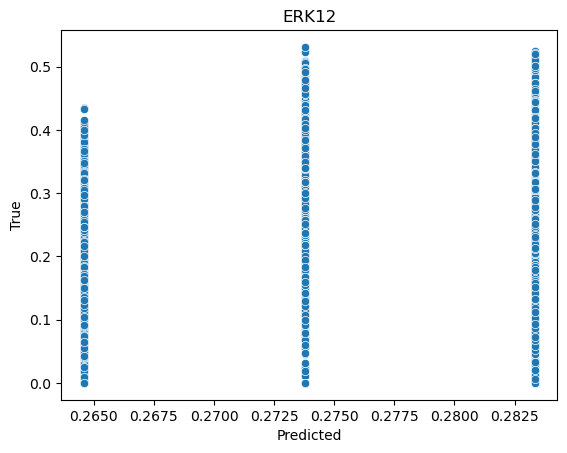

In [22]:
node = "ERK12"
sns.scatterplot(x=my_model.output_states[node], y=test_data[node]).set_title(node)
plt.xlabel("Predicted")
plt.ylabel("True")

In [14]:
my_model.nodes

NodeView(('PIP3', 'AKT_S473', 'p53', 'RB', 'GSK3B', 'AMPK', 'cleavedCas', 'SMAD23', 'ERK12', 'MSK12', 'MKK36', 'H3', 'p90RSK', 'SERUM', '_and_mTOR', 'AKT', 'NFkB', 'cAMP', 'PKA', 'PKC', 'p38', 'PLCg2', 'MET', 'RAF', 'mTOR', 'p70S6K', 'PDPK1', 'AKT_T308', 'MAPKAPK2', 'PTEN', '_or_mTOR', 'b-catenin', 'S6', 'CREB', 'RAS', 'PI3K', 'BTK', 'RAF_S259', 'MARCKS', 'SRC', 'FAK', 'EGFR', 'MEK12_S221', '4EBP1', 'SYK', 'MKK4', 'JNK', 'MAP3Ks', 'INSR', 'PAK', 'STAT5', '_and_RAS', '_and_PIP3', 'EGF', '_and_RAF', 'MEK12', 'STAT1', 'STAT3', 'not1', 'not2', 'not3', 'not4', 'or1', 'or2', 'or3', 'or4', 'or5', 'or6', 'or7', 'or8', 'or9', 'or10', 'or11', 'or12', 'or13', 'or14', 'or15', 'or16', 'or17', 'or18', 'or19', 'or20', 'or21', 'or22', 'or23', 'or24', 'or25', 'or26', 'or27', 'or28', 'or29', 'or30', 'or31', 'or32', 'or33', 'or34', 'or35', 'or36', 'or37', 'or38', 'or39', 'or40', 'or41'))

In [27]:
test_data["PLCg2"].unique()

tensor([0.0000e+00, 6.9965e-05, 2.1480e-04,  ..., 9.3541e-01, 9.6184e-01,
        1.0000e+00])

In [29]:
my_model.output_states["PLCg2"].unique()

tensor([0.3192, 0.3655, 0.3971])

In [ ]:
test

In [ ]:
pickle.dump(my_model, open("/Users/adr/Box/CAR_Tcells/Model/test_"))